In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.shape

(4600, 18)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# let find outliers

<Axes: xlabel='price', ylabel='Count'>

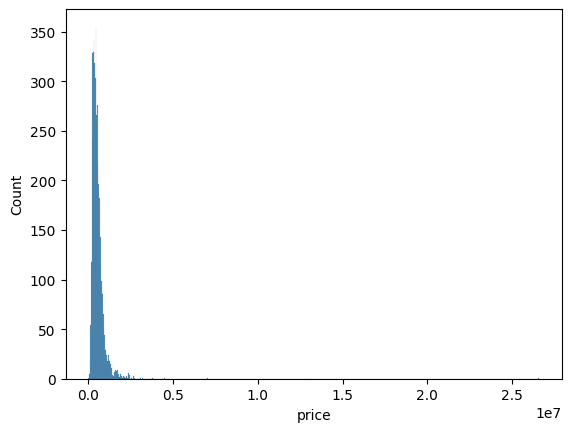

In [59]:
sns.histplot(df.price)

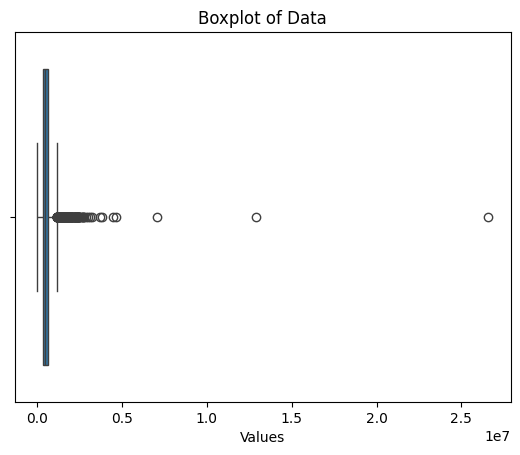

In [58]:
sns.boxplot(x=df.price)
plt.title("Boxplot of Data")
plt.xlabel("Values")
plt.show()

# price cannot be zero so replace with median 

In [57]:
median_price = df['price'].median()

# Replace all values in 'price' that are 0 with the median
df['price'] = df['price'].replace(0, median_price)


In [60]:
Q1,Q3=df.price.quantile([0.25,0.75])
Q1,Q3
IQR=Q3-Q1
LOWER=Q1 -3*IQR
UPPER=Q3+ 3*IQR
LOWER,UPPER


(-652251.785714, 1635373.2142854999)

<Axes: xlabel='price', ylabel='Count'>

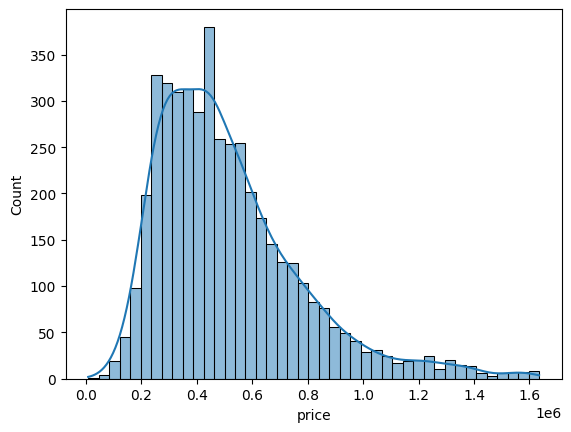

In [61]:
df_new=df[df.price<1635373.2142854999]

sns.histplot(df_new.price,kde=True)

In [62]:
df_new.shape

(4509, 18)

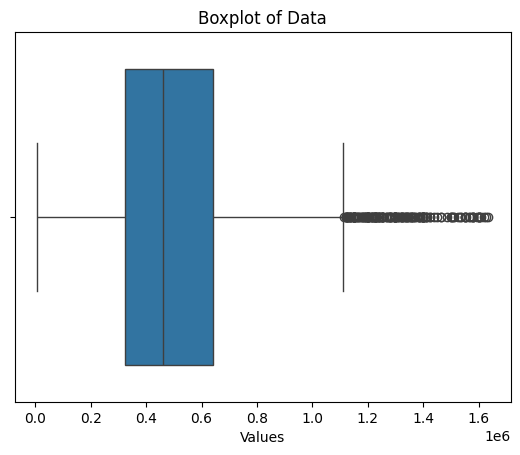

In [63]:
import matplotlib.pyplot as plt
# Boxplot
sns.boxplot(x=df_new.price)
plt.title("Boxplot of Data")
plt.xlabel("Values")

plt.show()

In [65]:
df_new.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.509000e+03,4509.000000,4509.000000,4509.000000,4.509000e+03,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000
mean,5.153235e+05,3.381238,2.132679,2090.411843,1.472157e+04,1.504546,0.004879,0.213795,3.448658,1790.537148,299.874695,1970.834331,806.369040
std,2.612582e+05,0.894830,0.746934,871.199753,3.587222e+04,0.537142,0.069688,0.730241,0.674574,807.171228,441.816304,29.654949,979.002055
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.250000e+05,3.000000,1.750000,1450.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1960.000000,7.631000e+03,1.500000,0.000000,0.000000,3.000000,1570.000000,0.000000,1976.000000,0.000000
75%,6.400000e+05,4.000000,2.500000,2570.000000,1.081400e+04,2.000000,0.000000,0.000000,4.000000,2250.000000,600.000000,1997.000000,1999.000000
max,1.635000e+06,9.000000,6.250000,8020.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,2850.000000,2014.000000,2014.000000


<Axes: xlabel='bedrooms'>

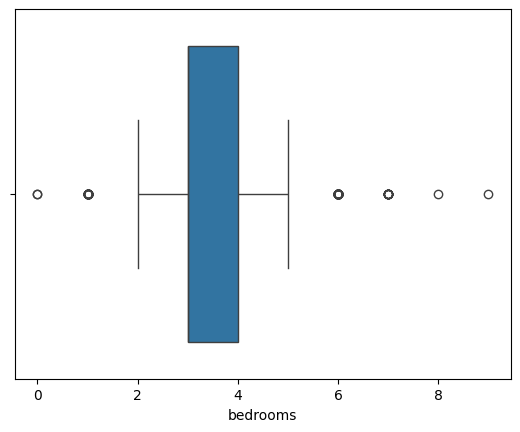

In [66]:
sns.boxplot(x=df_new.bedrooms)

<Axes: xlabel='bedrooms', ylabel='Count'>

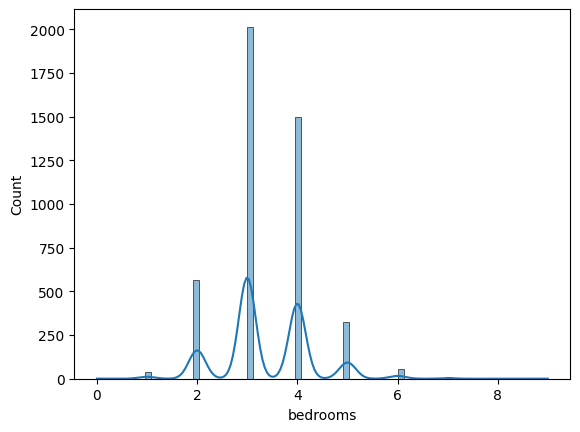

In [67]:
sns.histplot(df_new.bedrooms,kde=True)

In [72]:
median_price = df_new['bedrooms'].median()

# Replace all values in 'price' that are 0 with the median
df_new['bedrooms'] = df_new['bedrooms'].replace(0, median_price)


C:\Users\lekhr\AppData\Local\Temp\ipykernel_19316\3758230003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['bedrooms'] = df_new['bedrooms'].replace(0, median_price)


In [73]:
df_new.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.509000e+03,4509.000000,4509.000000,4509.000000,4.509000e+03,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000
mean,5.153235e+05,3.382568,2.132679,2090.411843,1.472157e+04,1.504546,0.004879,0.213795,3.448658,1790.537148,299.874695,1970.834331,806.369040
std,2.612582e+05,0.892027,0.746934,871.199753,3.587222e+04,0.537142,0.069688,0.730241,0.674574,807.171228,441.816304,29.654949,979.002055
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.250000e+05,3.000000,1.750000,1450.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1960.000000,7.631000e+03,1.500000,0.000000,0.000000,3.000000,1570.000000,0.000000,1976.000000,0.000000
75%,6.400000e+05,4.000000,2.500000,2570.000000,1.081400e+04,2.000000,0.000000,0.000000,4.000000,2250.000000,600.000000,1997.000000,1999.000000
max,1.635000e+06,9.000000,6.250000,8020.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,2850.000000,2014.000000,2014.000000


In [74]:
df_new[df_new.bedrooms==9]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
241,2014-05-07 00:00:00,599999.0,9.0,4.5,3830,6988,2.5,0,0,3,2450,1380,1938,2003,8809 Densmore Ave N,Seattle,WA 98103,USA


In [76]:
Q11,Q33=df_new.bedrooms.quantile([0.25,0.75])
Q11,Q33
IQR1=Q33-Q11
LOWER1=Q11 -3*IQR1
UPPER1=Q33+ 3*IQR1
LOWER1,UPPER1


(0.0, 7.0)

In [78]:
df1=df_new[df_new.bedrooms<UPPER1]
df1.shape

(4496, 18)

In [80]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.496000e+03,4496.000000,4496.000000,4496.000000,4.496000e+03,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000
mean,5.149893e+05,3.371441,2.127447,2086.262678,1.472428e+04,1.504448,0.004893,0.213523,3.449288,1787.920819,298.341859,1970.852980,804.691504
std,2.611703e+05,0.868391,0.739626,867.004743,3.591875e+04,0.537143,0.069788,0.730553,0.674737,804.718625,439.792051,29.665101,978.656945
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.250000e+05,3.000000,1.750000,1450.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1951.000000,0.000000
50%,4.609152e+05,3.000000,2.250000,1952.000000,7.624500e+03,1.500000,0.000000,0.000000,3.000000,1570.000000,0.000000,1976.000000,0.000000
75%,6.400000e+05,4.000000,2.500000,2570.000000,1.081250e+04,2.000000,0.000000,0.000000,4.000000,2250.000000,600.000000,1997.000000,1999.000000
max,1.635000e+06,6.000000,6.250000,8020.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,2850.000000,2014.000000,2014.000000


<Axes: xlabel='bedrooms'>

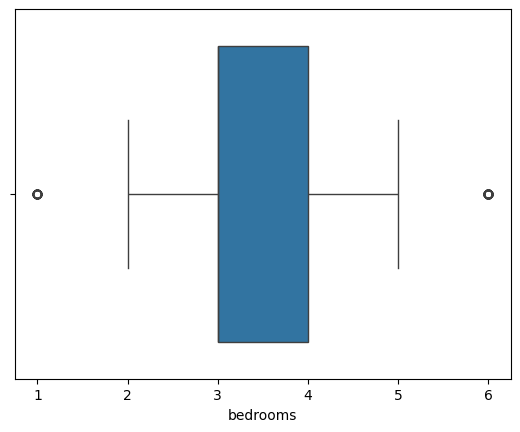

In [82]:
sns.boxplot(x=df1.bedrooms)

In [93]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'price' column
q1, q3 = df1['bathrooms'].quantile([0.25, 0.75])

# Compute the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds for outlier detection
lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr

# Print the calculated bounds
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")



Lower Bound: -0.5, Upper Bound: 4.75


In [97]:
df2=df1[df1.bathrooms<4.75]
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.485000e+03,4485.000000,4485.000000,4485.000000,4.485000e+03,4485.000000,4485.000000,4485.000000,4485.000000,4485.000000,4485.000000,4485.000000,4485.000000
mean,5.142470e+05,3.367447,2.120011,2079.412040,1.465653e+04,1.503902,0.004682,0.211148,3.450167,1781.721739,297.690301,1970.799777,806.219175
std,2.602707e+05,0.864923,0.724837,854.310471,3.580962e+04,0.537236,0.068274,0.726558,0.675180,791.869663,438.585943,29.676843,978.955528
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.250000e+05,3.000000,1.750000,1450.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1950.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,1570.000000,0.000000,1975.000000,0.000000
75%,6.400000e+05,4.000000,2.500000,2560.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,2250.000000,600.000000,1997.000000,1999.000000
max,1.635000e+06,6.000000,4.500000,7320.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,7320.000000,2850.000000,2014.000000,2014.000000


<Axes: xlabel='sqft_living'>

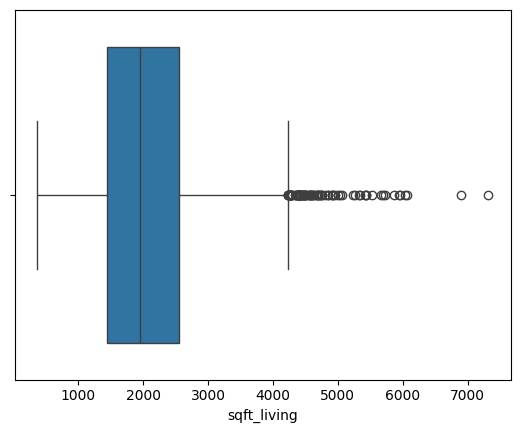

In [95]:
sns.boxplot(x=df2.sqft_living)

In [98]:
# Calculate S1 (25th percentile) and S3 (75th percentile) of the 'bathrooms' column
s1, s3 = df2['sqft_living'].quantile([0.25, 0.75])

# Compute the Interquartile Range (IQR)
iqr = s3 - s1

# Calculate the lower and upper bounds for outlier detection
lower_bound = s1 - 3 * iqr
upper_bound = s3 + 3 * iqr

# Print the calculated bounds
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -1880.0, Upper Bound: 5890.0


In [100]:
df3=df2[df2.sqft_living<upper_bound]


<Axes: xlabel='sqft_living'>

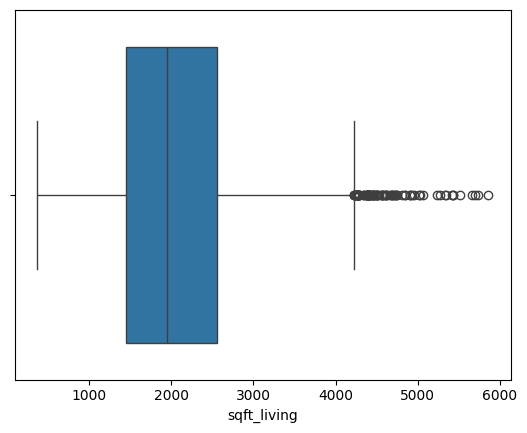

In [101]:
sns.boxplot(x=df3.sqft_living)

In [102]:
df3.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.479000e+03,4479.000000,4479.000000,4479.000000,4.479000e+03,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000
mean,5.134687e+05,3.365037,2.117604,2073.662201,1.447993e+04,1.503237,0.004689,0.210092,3.450547,1776.957357,296.704845,1970.765796,806.851976
std,2.593033e+05,0.862623,0.722086,840.070489,3.532848e+04,0.537288,0.068320,0.724315,0.675415,780.654500,437.010609,29.681168,979.077117
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.250000e+05,3.000000,1.750000,1450.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1950.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,1570.000000,0.000000,1975.000000,0.000000
75%,6.390000e+05,4.000000,2.500000,2560.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,2240.000000,600.000000,1997.000000,1999.000000
max,1.635000e+06,6.000000,4.500000,5860.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,5430.000000,2850.000000,2014.000000,2014.000000


<Axes: xlabel='sqft_above'>

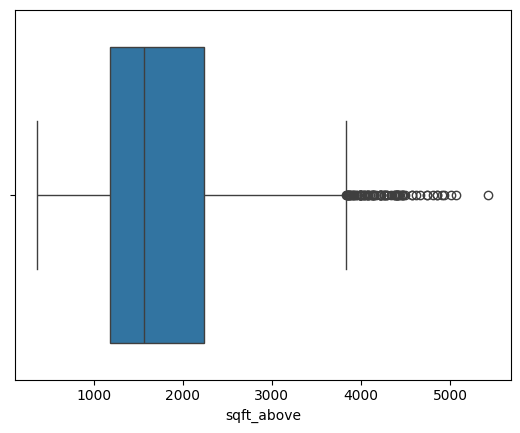

In [105]:
sns.boxplot(x=df3.sqft_above)

In [106]:
# Calculate H1 (25th percentile) and H3 (75th percentile) of the 'bathrooms' column
h1, h3 = df3['sqft_above'].quantile([0.25, 0.75])

# Compute the Interquartile Range (IQR)
iqr1 = h3 - h1

# Calculate the lower and upper bounds for outlier detection
lower_bound = h1 - 3 * iqr1
upper_bound = h3 + 3 * iqr1

# Print the calculated bounds
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -2000.0, Upper Bound: 5420.0


In [109]:
df4=df3[df3.sqft_above<upper_bound]
df4.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.478000e+03,4478.000000,4478.000000,4478.000000,4.478000e+03,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000
mean,5.132796e+05,3.364895,2.117407,2072.912684,1.445884e+04,1.503126,0.004690,0.210138,3.450424,1776.141581,296.771103,1970.762171,807.032157
std,2.590234e+05,0.862667,0.722046,838.665191,3.530423e+04,0.537297,0.068327,0.724389,0.675440,778.830005,437.036912,29.683490,979.112185
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.250000e+05,3.000000,1.750000,1450.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1950.000000,7.612000e+03,1.500000,0.000000,0.000000,3.000000,1570.000000,0.000000,1975.000000,0.000000
75%,6.387500e+05,4.000000,2.500000,2560.000000,1.079650e+04,2.000000,0.000000,0.000000,4.000000,2240.000000,600.000000,1997.000000,1999.000000
max,1.635000e+06,6.000000,4.500000,5860.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,5070.000000,2850.000000,2014.000000,2014.000000


In [113]:
# Calculate A1 (25th percentile) and A3 (75th percentile) of the 'bathrooms' column
a1, a3 = df4['sqft_basement'].quantile([0.25, 0.75])

# Compute the Interquartile Range (IQR)
iqr2 = a3 - a1

# Calculate the lower and upper bounds for outlier detection
lower_bound = a1 - 3 * iqr2
upper_bound = a3 + 3 * iqr2

# Print the calculated bounds
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -1800.0, Upper Bound: 2400.0


In [115]:
df5=df4[df4.sqft_basement<upper_bound]

<Axes: xlabel='sqft_above'>

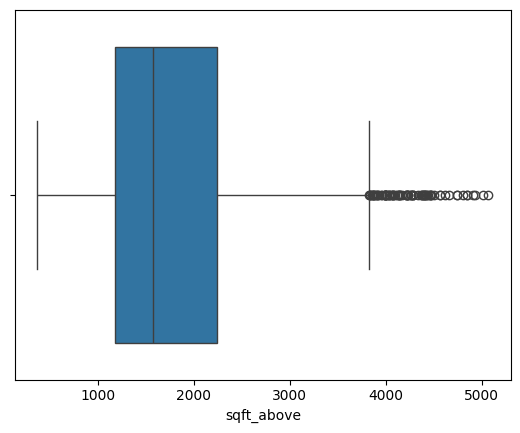

In [116]:
sns.boxplot(x=df5.sqft_above)

In [117]:
df5.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.477000e+03,4477.000000,4477.000000,4477.000000,4.477000e+03,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000
mean,5.130849e+05,3.364306,2.117266,2072.102524,1.445761e+04,1.503239,0.004691,0.209292,3.450302,1775.901720,296.200804,1970.760777,807.212419
std,2.587243e+05,0.861864,0.722065,837.004544,3.530807e+04,0.537304,0.068335,0.722252,0.675466,778.751566,435.416100,29.686660,979.147235
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.250000e+05,3.000000,1.750000,1450.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1950.000000,7.609000e+03,1.500000,0.000000,0.000000,3.000000,1570.000000,0.000000,1975.000000,0.000000
75%,6.380000e+05,4.000000,2.500000,2560.000000,1.078600e+04,2.000000,0.000000,0.000000,4.000000,2240.000000,600.000000,1997.000000,1999.000000
max,1.635000e+06,6.000000,4.500000,5860.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,5070.000000,2330.000000,2014.000000,2014.000000


In [118]:
# Save the processed DataFrame to a CSV file
df5.to_csv('processed_data.csv', index=False)  # index=False excludes the row numbers from the file


# let train model

In [119]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
data = pd.read_csv('processed_data.csv')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
3,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
4,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4473,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4474,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4475,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [121]:
# Splitting data
X = data.drop('price', axis=1).apply(pd.to_numeric, errors="coerce") # the features that help us predict the price
y = data['price'].apply(pd.to_numeric, errors="coerce") # the value we want to predict
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y

(      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
 0      0.0       3.0       1.50         1340      7912     1.5           0   
 1      0.0       3.0       2.00         1930     11947     1.0           0   
 2      0.0       3.0       2.25         2000      8030     1.0           0   
 3      0.0       4.0       2.50         1940     10500     1.0           0   
 4      0.0       2.0       1.00          880      6380     1.0           0   
 ...    ...       ...        ...          ...       ...     ...         ...   
 4472   0.0       3.0       1.75         1510      6360     1.0           0   
 4473   0.0       3.0       2.50         1460      7573     2.0           0   
 4474   0.0       3.0       2.50         3010      7014     2.0           0   
 4475   0.0       4.0       2.00         2090      6630     1.0           0   
 4476   0.0       3.0       2.50         1490      8102     2.0           0   
 
       view  condition  sqft_above  sqft_basement 

In [122]:
# Training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [123]:
# Making prediction
y_pred = model.predict(X_test)
X_test, y_pred

(      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
 3430   0.0       3.0       2.50         2490      4540     2.5           0   
 4300   0.0       4.0       2.50         2740     12899     2.0           0   
 1588   0.0       2.0       1.50         1220      3568     1.5           0   
 1029   0.0       4.0       2.75         3488      9614     2.0           0   
 1207   0.0       3.0       1.00         1280      2580     1.5           0   
 ...    ...       ...        ...          ...       ...     ...         ...   
 2016   0.0       2.0       1.75         1740      5400     1.0           0   
 2344   0.0       4.0       2.50         5730     44947     2.0           0   
 100    0.0       3.0       2.25         2010      6000     1.0           0   
 1094   0.0       4.0       2.25         2000      9000     1.0           0   
 1222   0.0       4.0       2.50         2560     36601     2.0           0   
 
       view  condition  sqft_above  sqft_basement 

In [124]:
# Evaluating model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 33219995673.587593
R-squared: 0.48666757913363123


In [125]:
# Making custom prediction
feature_names = X.columns
custom_X = np.array([[0, 3, 1, 1090, 6435, 1, 0, 0, 4, 1090, 0, 1955, 2009, 2504, 0, 98106, 0]])
custom_X = pd.DataFrame(custom_X, columns=feature_names)

custom_prediction = model.predict(custom_X)
print(f"Predicted price: ${custom_prediction[0].round(2)}")

Predicted price: $287023.3


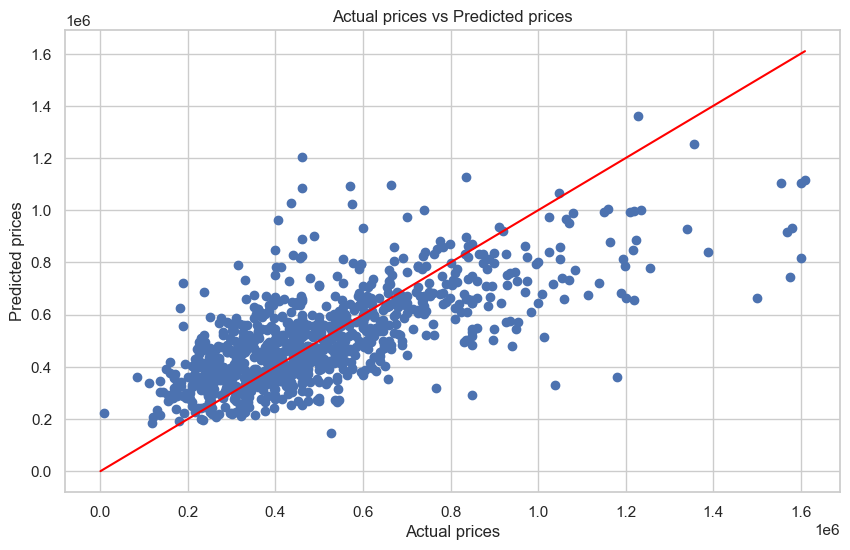

In [126]:
# Plotting prediction results
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red')
plt.show()